# Example_2_1

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Let us suppose that our observable has the following structure

$$
y=w_{1}\phi_{1}\left(x\right)+w_{2}\phi_{2}\left(x\right)+\varepsilon
$$

where $x\in\left(0,10\right)$ and the two arbitrary basis are 

$$
\phi_{1}\left(x\right)=\cos\frac{\pi}{3}x,
\phi_{2}\left(x\right)=\sin\frac{\pi}{7}x
$$

and $\varepsilon$ a white Gaussian noise with power $\sigma_{n}^{2}$. The objective is to write a Python
code to calculate coefficients $w_{1}$, $w_{2}$ from $y$ according to 
$$
\underset{{\bf{x}}\in\mathbb{R}^{d}}{\min}\left(\frac{1}{N}\left\Vert {\bf{X}}{\bf{w}}-{\bf{y}}\right\Vert _{2}^{2}\right)
$$

In [13]:
sigma2_noise=.25;                                       # Noise power
w1=2;                                                   # Arbitrary
w2=3;                                                   # Arbitrary
f1=math.pi/3;                                           # One frequency
f2=math.pi/7;                                           # The other frequency
x=np.linspace(0,10,int(10/0.01));                       # Samples
y=w1*np.cos(f1*x)+w2*np.sin(f2*x);                      # Clean signal
y_n=y+np.random.randn(len(y))*np.sqrt(sigma2_noise);    # Noisy signal

array([[2.        , 3.        ],
       [1.98585851, 3.02977096]])

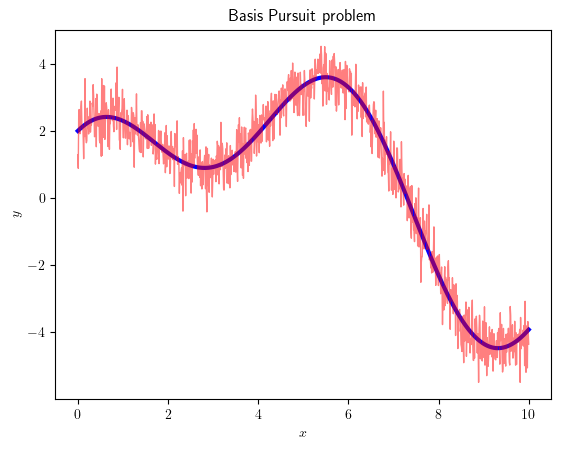

In [45]:
plt.rcParams['text.usetex'] = True
plt.plot(x,y,'b',linewidth=3)
plt.plot(x,y_n,'r',linewidth=1,alpha=0.5)
plt.grid
plt.title('Basis Pursuit problem')
plt.xlabel(r"$x$")
plt.ylabel(r'$y$')
#plt.savefig('BasisPursuit.png',dpi=300)
# You have to infer w1,w2 from y_n
X=np.array([np.cos(f1*x), np.sin(f2*x)]).T;               # Matrix
w=np.linalg.inv(X.T@X)@X.T@y_n.reshape(-1,1);             # Least squares problem
# Solution
np.array([[w1,w2], np.squeeze(w)])